## Chapter 2 - Deep Learning

Hierarchical feature learning

Scalable learning across domain (e.g. CNN: convolutional neutral network) like a multilayer perceptron feedforward neutral networks, the technique scales with data and model size and can be trained with backpropagation.

## Chapter 3 - Promise of Deep Learning for NL

Better performance by models that may require more data but less linguistic expertise to train and operate.

### 3.1. Promise of Drop-in replacement models

Deep learning method that can be dropped into existing NL sys as replacement models

### 3.2. Promise of New NLP model

methods, offer the opportunity of new modeling approaches to challenging nl problems like sequence-to-sequence prediction

### 3.3. Promise of feature learning

methods, learn the features by models, rather than requiring specific features and expert.

### 3.4. Promise of Continued improvement

performance of DL based on real results and improvements appear to continuing and perhaps speeding up.

### 3.5. Promise of End-to-End models

to offer more general and better performing approach.

## Chapter 4 - Develop Deep Learning Models with Keras

### 4.1. Keras model Life-Cycle

### 1. Define network

Neutral network in Keras is defined as sequence of layers. The container for these layers is the Sequential class.    
 model = Sequential()
    
model.add(Dense(2))

*) Sequential model with one Dense layer and 2 neurons

or

layers = [Dense(2)]

model = Sequential(layers)
    
The first layer in the network must define the number of inputs to expect (depends on the network type). 

The Multilayer perceptron model is specified by the $\textbf{input_dim}$ attribute. Ex, Multilayer perceptron model with 2-layer inputs visible, 5 neurons in hidden layer and one neuron in the output layer

model = Sequential()

model.add(Dense(5, input_dim=2))

model.add(Dense(1)}

Adding prediction function is separated in the Sequential model, such as Activation class

model = Sequential()

model.add(Dense(5, input_dim=2))

model.add(Activation('$relu$'))

model.add(Dense(1))

model.add(Activation('$sigmoid$'))

*) Sequential model with Activation functions for each layer.

*) Choose the Activation functions:

**) $linear$ activation, for regression and number of neurons matching the number of output

**) $sigmoid$ activation, Logistic function for Binary classification (2 classes), and one neuron for output

**) $softmax$ activation, the Softmax function for Multiclass classification (>2 classes), assuming a one hot encoded output pattern

### 2. Compile network

Depending on how Keras is configured, compilation will be executed on GPU or CPU.

Parameters of compile() function: optimization algorithm is used to train the network, loss function is used to evaluate the network that is minimized by the optimization algorithm. 

model.compile(optimizer='sgd', loss='mean_squared_error')

*) optimization algorithm uses 'sgd' (Stochastic Gradient Descent)

*) loss function with using mean squared error

We also define the optiomization algorithm before using in compile function

algorithm = SGD(lr=0.1, momentum=0.3)

model.compile(optimizer=algorithm, loss='categorical_crossentropy')

The type of predictive modeling problem impose constraints on type of loss function

*) Regression: mean_squared_error

*) Binary classification: Logarithmic loss, binary_crossentropy

*) Multiclass classification: multiclass logarithmic loss, categorical_crossentropy

The most common optimization algorithm is 'sgd', others:

*) Stochastic Gradient Descent 'sgd', that requires the tuning of a learning rate and momentum

*) Adam 'adam', requires tuning of learning rate

*) RMSprop 'rmsprop', requires tuning of learning rate

Finally, using specify metrics to collect while fitting the model in addition to the loss function.

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

### 3. Fit network

A network is fitting on the training datasets, both a matrix of input pattern X, and the array of matching output pattern y, by using backpropagation. The backpropagation algorithm requires that the network be trained for a specified number of epochs or exposures to the training dataset. This defines the number of patterns that the network is exposed to before the weights are updated within an epoch. It is an efficiency optimization, ensuring that not too many input patterns are loaded into memory at a time.

classifier = model.fit(X, y, batch_size=10, epochs=100)

*) classifier: object to handle result performance of training dataset, including loss value, and additional metrics, recorded each epoch.

*) We can turn off all output information by setting verbose to 0

classifier = model.fit(X, y, batch_size=10, epoch=5, verbose=0)

### 4. Evaluate network

The model evaluates the loss across all the test pattern, to check the performance of model. That the network make a prediction on unseen (testing) dataset.

loss, accuracy = model.evaluate(X_test, y)

Limited output information with verbose=0

### 5. Make Prediction

After all, the model's performance is satisfaction, we can use it to make predictions on new data

predictions = model.predict(X_new)

The output of predictions is the output layer of the network.

For multiclass classification problem, the results may be in the form of an array of probabilities. 

Using predict_classes() function that will automatically convert uncrisp predictions to crisp integer class values

predictions = model.predict_classes(X_new)

### 4.2. Keras Functional Models

The functional APIs in Keras:

### 4.2.1. Defining Input

from keras.layers import Input

visible = Input(shape=(2, ))

*) shape argument: tuple to indicate the dimensionality of the input data. (2, ) in case of multilayer Perceptron, leave the room for the shape of the mini-batch size when splits the data into train and test set

### 4.2.2. Connecting Layers

The layer in network is connected pairwise. Which defines the input layer, and the hidden layer.

from keras.layers import Input

from keras.layers import Dense

visible = Input(shape=(2, ))

hidden = Dense(2)(visible)

*) $(visible)$ of the Dense layer that connects the input layer's output as the input to the Dense hidden layer.

### 4.2.3. Creating the Model

from keras.layers import Input

from keras.layers import Dense

from keras.models import Model

visible = Input(shape=(2, ))

hidden = Dense(2)(visible)

model = Model(inputs=visible, output=hidden)

*) Model class create a model from your created layers, it requires the specific input and output layers.


### 4.3. Standard Network Models

### 4.3.1. Simple Multilayer Perceptron

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


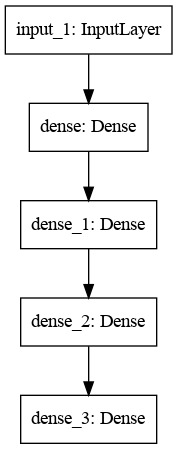

In [1]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense


visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='multilayer_perceptron.png')

### 4.3.2. Convolution Neural Network

Image classification, the model receives black and white 64x64 images as input, then has a sequence of two convolutional and pooling layers as feature extraction, followed by a fully connected layer to interpret the features and an output layer with a sigmoid activation for two-class prediction

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 13, 13, 10)        170       
_________________________________________________________________
dense_5 (Dense)              (None, 13, 13, 1)         11  

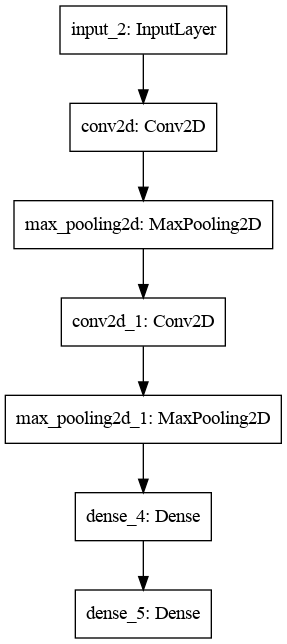

In [2]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D

visible = Input(shape=(64, 64, 1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

hidden1 = Dense(10, activation='relu')(pool2)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

model.summary()

plot_model(model)

### 4.3.3. Recurrent Neural Network
Sequential(): recurrent neural network for sequence classification.

LSTM(): the long short-term memory recurrent neural network for sequence. The model has single LSTM hidden layer to extract features from sequence. Followed by fully connected layer to interpret the LSTM output, followed by an output layer for making binary predictions.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 1)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


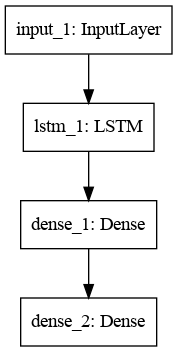

In [19]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM

visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)

model.summary()

plot_model(model, to_file='rnn_lstm.png')


### Brief recap on LSTMs
https://www.machinecurve.com/index.php/2021/01/07/build-an-lstm-model-with-tensorflow-and-keras/

A benefit of LSTMs with respect to simple RNNs lies in the fact that memory has been separated from the actual output mechanisms. The LSTM network is a kind of recurrent neural network, the recurrent neural network attempts to model time or sequence dependent behavior, such as language, stock price, electricity,... This performed by feeding back the output of a neural network layer at time t to the input of the same network layer at time t + 1.

classic RNNs are combined with activation functions like Sigmoid and Tanh, but primary is the Sigmoid (range in -1, 1) 

In [1]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Model config
add_metrics = ['accuracy']
batch_size = 128
embedding_output_dims = 15
loss_func = BinaryCrossentropy()
max_sequence_length = 300
num_distinct_words = 5000
num_epochs = 5
optimizer = Adam()
validation_split = 0.20
verbosity_mode = 1

## Disable eager execution
tf.compat.v1.disable_eager_execution()

## load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)

display(x_train.shape, x_test.shape)

(25000,)

(25000,)

In [6]:
display(y_train.shape, y_test.shape)

(25000,)

(25000,)

In [8]:
# display(x_train[0], x_test[0], y_train[0], y_test[0])

In [2]:
## Pad all sequences
padded_input = pad_sequences(x_train, maxlen=max_sequence_length, value=0.0) #0.0 to corresponse with PAD
padded_input_test = pad_sequences(x_test, maxlen=max_sequence_length, value=0.0)

## Define keras model
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

## compile model
model.compile(optimizer=optimizer, loss=loss_func, metrics=add_metrics)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 15)           75000     
_________________________________________________________________
lstm (LSTM)                  (None, 10)                1040      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 76,051
Trainable params: 76,051
Non-trainable params: 0
_________________________________________________________________


In [4]:
## train the model
classifier = model.fit(padded_input, y_train, batch_size=batch_size, epochs=num_epochs,
                      verbose=verbosity_mode, validation_split=validation_split)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - ETA: 0s - loss: 0.5914 - accuracy: 0.7030

/home/chuongnet/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


20000/20000 [==============================] - 19s 928us/sample - loss: 0.5914 - accuracy: 0.7030 - val_loss: 0.4270 - val_accuracy: 0.8452
Epoch 2/5
20000/20000 [==============================] - 18s 925us/sample - loss: 0.3494 - accuracy: 0.8681 - val_loss: 0.3573 - val_accuracy: 0.8526
Epoch 3/5
20000/20000 [==============================] - 18s 923us/sample - loss: 0.2657 - accuracy: 0.9032 - val_loss: 0.3217 - val_accuracy: 0.8710
Epoch 4/5
20000/20000 [==============================] - 18s 920us/sample - loss: 0.2234 - accuracy: 0.9222 - val_loss: 0.3055 - val_accuracy: 0.8768
Epoch 5/5
20000/20000 [==============================] - 18s 918us/sample - loss: 0.1960 - accuracy: 0.9334 - val_loss: 0.3292 - val_accuracy: 0.8686


In [5]:
## evaluate model with test set
test_results = model.evaluate(padded_input_test, y_test, verbose=0)

In [6]:
print(f'Test results: Loss= {test_results[0]}, Acc= {test_results[1]*100}')

Test results: Loss= 0.34106126883029936, Acc= 86.22000217437744


In [11]:
display(classifier.history)

{'loss': [0.591410935497284,
  0.3494469801425934,
  0.265696471619606,
  0.22337994124889374,
  0.19597925786972045],
 'accuracy': [0.703, 0.86815, 0.90315, 0.9222, 0.93345],
 'val_loss': [0.42696526613235475,
  0.35729103593826295,
  0.32169428129196165,
  0.3055043119430542,
  0.329220414018631],
 'val_accuracy': [0.8452, 0.8526, 0.871, 0.8768, 0.8686]}

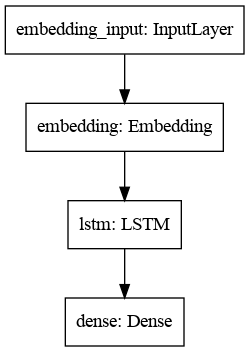

In [13]:
plot_model(model, to_file='lstm_embedding.png')

Text(0, 0.5, 'accuracy')

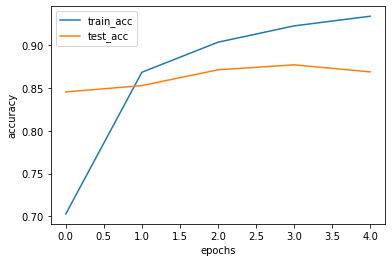

In [17]:
import matplotlib.pyplot as plt

plt.plot(classifier.history['accuracy'], label='train_acc')
plt.plot(classifier.history['val_accuracy'], label='test_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

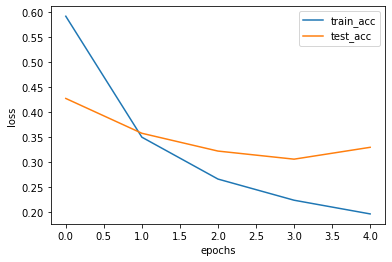

In [18]:
plt.plot(classifier.history['loss'], label='train_acc')
plt.plot(classifier.history['val_loss'], label='test_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')